<a href="https://colab.research.google.com/github/jmperalta89/portfolio/blob/main/analisis_de_sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Análisis* de Sentimientos:
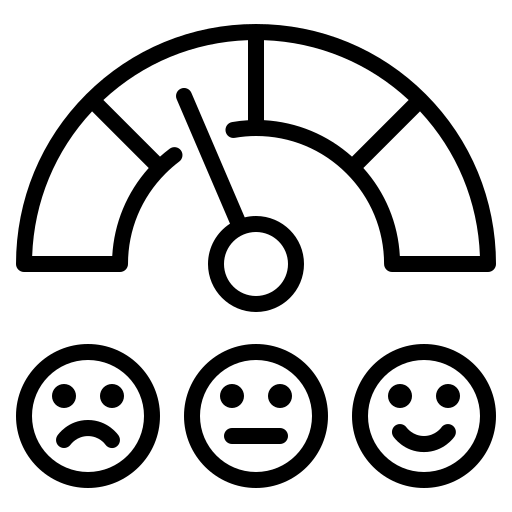

Técnica:

El análisis de sentimientos implica el uso de algoritmos de procesamiento de lenguaje natural (NLP) y aprendizaje automático para determinar la actitud o emoción expresada en un texto.
Los enfoques comunes incluyen el uso de modelos de aprendizaje automático supervisados (como clasificadores de texto) o técnicas de procesamiento de lenguaje natural basadas en reglas.
Estos algoritmos pueden clasificar el texto en categorías como positivo, negativo o neutral, o asignar puntuaciones de sentimiento que indican la intensidad de la emoción expresada.
Metodología:

La metodología del análisis de sentimientos generalmente implica las siguientes etapas:
Preprocesamiento de texto: limpieza y normalización del texto (eliminación de caracteres especiales, tokenización, eliminación de stopwords, lematización, etc.).
Selección o entrenamiento de un modelo de análisis de sentimientos: esto puede incluir la selección de algoritmos de aprendizaje automático, la extracción de características relevantes del texto y el entrenamiento del modelo con datos etiquetados previamente.
Evaluación del modelo: se evalúa el rendimiento del modelo utilizando métricas como precisión, exhaustividad, F1-score, matriz de confusión, etc.
Aplicación del modelo: una vez entrenado y evaluado, el modelo se aplica para analizar el sentimiento de textos nuevos o en tiempo real.

In [ ]:
pip install sentiment-analysis-spanish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 18.5 MB/s eta 0:00:00




---



In [ ]:
from sentiment_analysis_spanish import sentiment_analysis

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import randint

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/base_encuesta/encuesta_20240125_anonimizado.xlsx"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel(path)

In [ ]:
data.columns

Index(['Fecha de inicio', 'Fecha de finalización', 'Tipo de respuesta',
       'Dirección IP', 'Progreso', 'Duración (en segundos)', 'Finalizado',
       'Fecha registrada', 'ID de respuesta', 'Apellido del destinatario',
       'Nombre del destinatario', 'Referencia a datos externos',
       'Latitud de la ubicación', 'Longitud de la ubicación',
       'Canal de la distribución', 'Idioma del usuario',
       '¿Has oído hablar de los fondos comunes de inversión (FCI)? Es un producto nuevo que paga un interés por cualquier dinero depositado.',
       '¿Por qué no operas con ellos?',
       'Si tuvieras que adivinar, ¿Cuál crees que es la tasa de interés que pagan los fondos comunes de inversión durante un mes? Proporcione una respuesta en %, por ejemplo, 5 significa que cree que los fondos comunes de inversión pagan un interés del 5% durante un mes, 10 significa que cree que el interés es del 10% por mes.',
       '¿Te interesaría saber más sobre los beneficios de usar los fondos comune

In [ ]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
print(sentiment.sentiment("No me interesa"))

0.058553252288677915


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
print(sentiment.sentiment("Terriblo esto que me decis"))

0.03676428138872851


In [ ]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
print(sentiment.sentiment("Esta muy bueno!!!!"))

0.9788432239570454


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
# Eliminar filas con valores NaN en la columna '¿Por qué no operas con ellos?'
data = data.dropna(subset=['¿Por qué no operas con ellos?'])

In [ ]:
res= {}
for i,row in tqdm(data.iterrows(), total=len(data)):
    text= row['¿Por qué no operas con ellos?']
    myid = row['ID de respuesta']
    res[myid] = sentiment.sentiment(text)


  0%|          | 0/943 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(res, index=[0]).T

In [ ]:
df.columns

Int64Index([0], dtype='int64')

In [ ]:
df = df.rename(columns={0:"Score"})

In [ ]:
df['ID de respuesta'] = df.index

In [ ]:
# Define una función para asignar el sentimiento
def asignar_sentimiento(score):
    if score <= 0.33:
        return 'NEG'
    elif score <= 0.66:
        return 'NEU'
    else:
        return 'POS'

# Aplica la función a la columna "0" para crear una nueva columna "sentimiento"
df['Sentimiento'] = df['Score'].apply(asignar_sentimiento)

print(df)

                      Score    ID de respuesta Sentimiento
R_65qmqFFZQdGBk3v  0.092355  R_65qmqFFZQdGBk3v         NEG
R_30Ggjc9CXln0Dqq  0.497892  R_30Ggjc9CXln0Dqq         NEU
R_7zVrScUt5O3vUNb  0.211824  R_7zVrScUt5O3vUNb         NEG
R_61YNdP6kw8Te0ad  0.058553  R_61YNdP6kw8Te0ad         NEG
R_12g7JIM35th9lzu  0.103353  R_12g7JIM35th9lzu         NEG
...                     ...                ...         ...
R_6n8JPWCh2f4R9aF  0.058553  R_6n8JPWCh2f4R9aF         NEG
R_5M5StBPpyeW75K5  0.030490  R_5M5StBPpyeW75K5         NEG
R_1HkhZq7h0LoU3Nn  0.000022  R_1HkhZq7h0LoU3Nn         NEG
R_3gFwgIn9WjMNMiA  0.000012  R_3gFwgIn9WjMNMiA         NEG
R_7dosAshYzj8U0hX  0.020328  R_7dosAshYzj8U0hX         NEG

[943 rows x 3 columns]


In [ ]:
df = df.reset_index()

In [ ]:
print(df)

                 index     Score    ID de respuesta Sentimiento
0    R_65qmqFFZQdGBk3v  0.092355  R_65qmqFFZQdGBk3v         NEG
1    R_30Ggjc9CXln0Dqq  0.497892  R_30Ggjc9CXln0Dqq         NEU
2    R_7zVrScUt5O3vUNb  0.211824  R_7zVrScUt5O3vUNb         NEG
3    R_61YNdP6kw8Te0ad  0.058553  R_61YNdP6kw8Te0ad         NEG
4    R_12g7JIM35th9lzu  0.103353  R_12g7JIM35th9lzu         NEG
..                 ...       ...                ...         ...
938  R_6n8JPWCh2f4R9aF  0.058553  R_6n8JPWCh2f4R9aF         NEG
939  R_5M5StBPpyeW75K5  0.030490  R_5M5StBPpyeW75K5         NEG
940  R_1HkhZq7h0LoU3Nn  0.000022  R_1HkhZq7h0LoU3Nn         NEG
941  R_3gFwgIn9WjMNMiA  0.000012  R_3gFwgIn9WjMNMiA         NEG
942  R_7dosAshYzj8U0hX  0.020328  R_7dosAshYzj8U0hX         NEG

[943 rows x 4 columns]


In [ ]:
df = df.drop(columns="index")

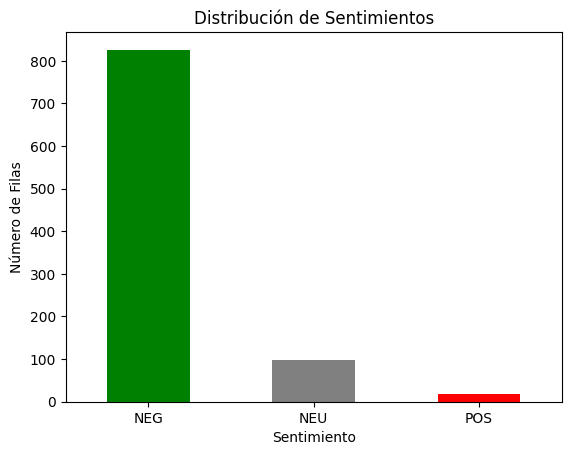

In [ ]:
import matplotlib.pyplot as plt

# Contar el número de filas para cada categoría de sentimiento
sentimiento_counts = df['Sentimiento'].value_counts()

# Crear un histograma de sentimientos
sentimiento_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.xlabel('Sentimiento')
plt.ylabel('Número de Filas')
plt.title('Distribución de Sentimientos')
plt.xticks(rotation=0)
plt.show()

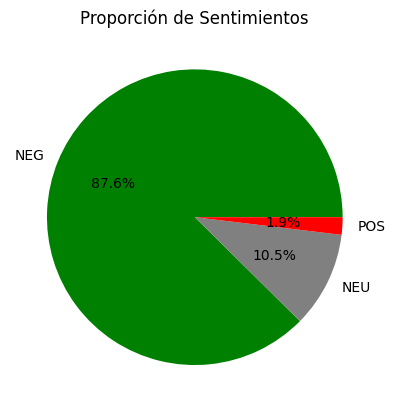

In [ ]:
# Crear un gráfico de torta de sentimientos
sentimiento_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.ylabel('')
plt.title('Proporción de Sentimientos')
plt.show()

<Figure size 800x600 with 0 Axes>

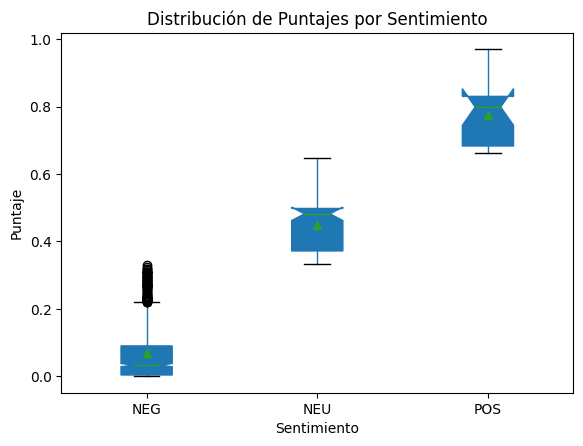

In [ ]:
# Crear un gráfico de caja de puntajes por sentimiento
plt.figure(figsize=(8, 6))
df.boxplot(column='Score', by='Sentimiento', grid=False, notch=True, patch_artist=True, showmeans=True)
plt.title('Distribución de Puntajes por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Puntaje')
plt.suptitle('')
plt.show()

In [ ]:
merge = pd.merge(data,df,how="left", on="ID de respuesta", indicator=True)

In [ ]:
merge.groupby(by="_merge").size()

_merge
left_only       0
right_only      0
both          943
dtype: int64

In [ ]:
print(merge)

        Fecha de inicio Fecha de finalización Tipo de respuesta  \
0   2024-01-17 12:09:21   2024-01-17 12:10:24        IP Address   
1   2024-01-17 12:10:15   2024-01-17 12:12:33        IP Address   
2   2024-01-17 12:12:37   2024-01-17 12:14:52        IP Address   
3   2024-01-17 12:14:42   2024-01-17 12:15:36        IP Address   
4   2024-01-17 12:15:25   2024-01-17 12:17:02        IP Address   
..                  ...                   ...               ...   
938 2024-01-23 17:25:21   2024-01-23 17:26:02        IP Address   
939 2024-01-24 17:41:01   2024-01-24 17:42:43        IP Address   
940 2024-01-24 19:38:56   2024-01-24 19:40:42        IP Address   
941 2024-01-24 19:45:16   2024-01-24 19:46:16        IP Address   
942 2024-01-25 11:43:29   2024-01-25 11:45:09        IP Address   

        Dirección IP  Progreso  Duración (en segundos)  Finalizado  \
0    186.141.199.189       100                      63        True   
1     170.51.135.154       100                     137 

In [ ]:
merge.columns

Index(['Fecha de inicio', 'Fecha de finalización', 'Tipo de respuesta',
       'Dirección IP', 'Progreso', 'Duración (en segundos)', 'Finalizado',
       'Fecha registrada', 'ID de respuesta', 'Apellido del destinatario',
       'Nombre del destinatario', 'Referencia a datos externos',
       'Latitud de la ubicación', 'Longitud de la ubicación',
       'Canal de la distribución', 'Idioma del usuario',
       '¿Has oído hablar de los fondos comunes de inversión (FCI)? Es un producto nuevo que paga un interés por cualquier dinero depositado.',
       '¿Por qué no operas con ellos?',
       'Si tuvieras que adivinar, ¿Cuál crees que es la tasa de interés que pagan los fondos comunes de inversión durante un mes? Proporcione una respuesta en %, por ejemplo, 5 significa que cree que los fondos comunes de inversión pagan un interés del 5% durante un mes, 10 significa que cree que el interés es del 10% por mes.',
       '¿Te interesaría saber más sobre los beneficios de usar los fondos comune

Contando con una columna con un puntaje o valoracion, puedo hacer el cruce con el sentimiento analizado

In [ ]:
df

,Score,ID de respuesta,Sentimiento
0,0.092355,R_65qmqFFZQdGBk3v,NEG
1,0.497892,R_30Ggjc9CXln0Dqq,NEU
2,0.211824,R_7zVrScUt5O3vUNb,NEG
3,0.058553,R_61YNdP6kw8Te0ad,NEG
4,0.103353,R_12g7JIM35th9lzu,NEG
...,...,...,...
938,0.058553,R_6n8JPWCh2f4R9aF,NEG
939,0.030490,R_5M5StBPpyeW75K5,NEG
940,0.000022,R_1HkhZq7h0LoU3Nn,NEG
941,0.000012,R_3gFwgIn9WjMNMiA,NEG


<ipython-input-29-99c9ee75574d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Score', y='Sentimiento', inner='box', palette='Dark2')


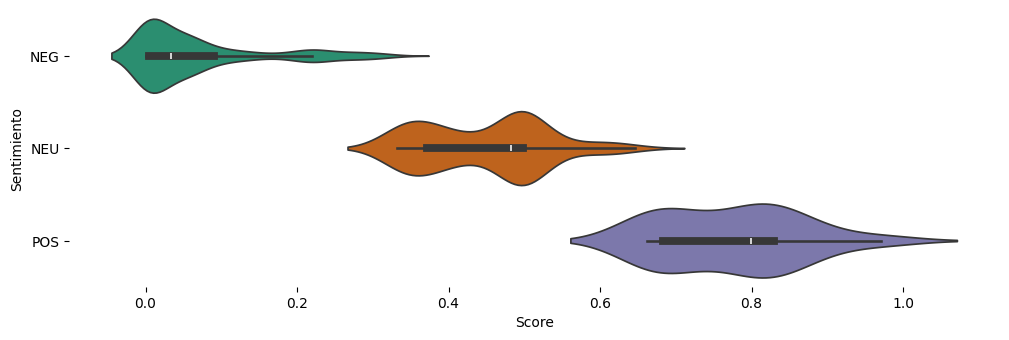

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sentimiento'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Score', y='Sentimiento', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

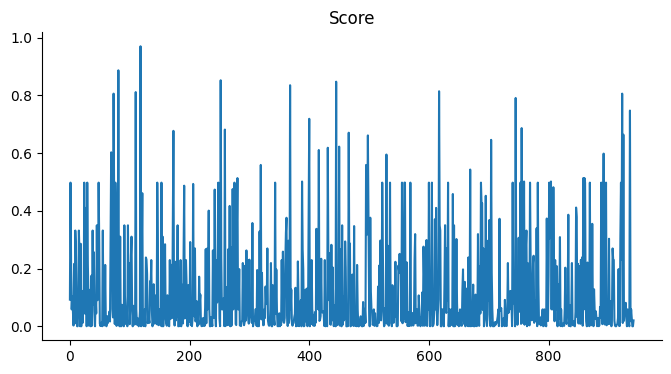

In [ ]:
from matplotlib import pyplot as plt
df['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

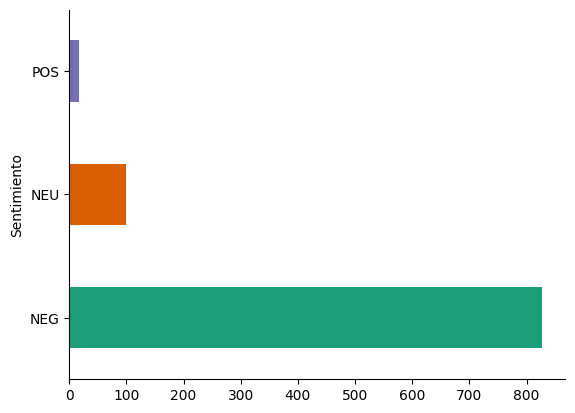

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentimiento').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

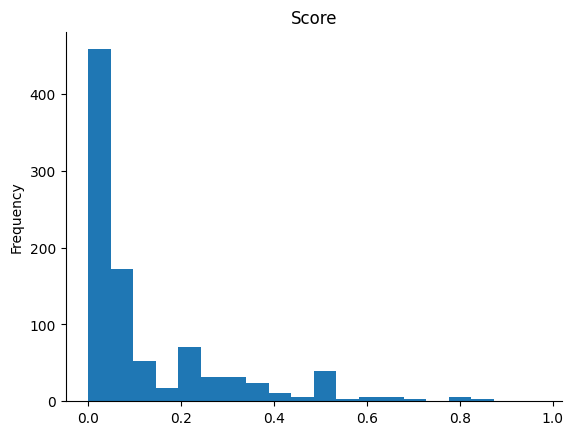

In [ ]:
from matplotlib import pyplot as plt
df['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Supongamos que tienes un DataFrame llamado 'merge' con una columna 'Sentimiento' que contiene las etiquetas de sentimiento

# Filtrar el top 10 de cada categoría de sentimiento
top_10_positivos = merge[merge['Sentimiento'] == 'POS'].nlargest(10, 'Score')
top_10_negativos = merge[merge['Sentimiento'] == 'NEG'].nlargest(10, 'Score')
top_10_neutrales = merge[merge['Sentimiento'] == 'NEU'].nlargest(10, 'Score')

# Imprimir los resultados
print("Top 10 de Sentimiento POSITIVO:")
print(top_10_positivos)

print("\nTop 10 de Sentimiento NEGATIVO:")
print(top_10_negativos)

print("\nTop 10 de Sentimiento NEUTRAL:")
print(top_10_neutrales)


Top 10 de Sentimiento POSITIVO:
        Fecha de inicio Fecha de finalización Tipo de respuesta  \
118 2024-01-17 13:13:53   2024-01-17 13:16:46        IP Address   
81  2024-01-17 12:59:18   2024-01-17 13:00:15        IP Address   
252 2024-01-17 13:53:33   2024-01-17 13:54:40        IP Address   
445 2024-01-17 15:52:49   2024-01-17 15:54:21        IP Address   
368 2024-01-17 14:51:19   2024-01-17 14:52:30        IP Address   
617 2024-01-17 21:19:06   2024-01-17 21:22:35        IP Address   
110 2024-01-17 13:11:43   2024-01-17 13:13:30        IP Address   
73  2024-01-17 12:56:41   2024-01-17 12:57:46        IP Address   
923 2024-01-22 12:47:19   2024-01-22 12:48:49        IP Address   
745 2024-01-17 16:51:31   2024-01-18 12:44:48        IP Address   

        Dirección IP  Progreso  Duración (en segundos)  Finalizado  \
118  190.195.166.169       100                     173        True   
81   152.169.184.184       100                      57        True   
252     200.63.20.18

In [ ]:
merge_test = merge[['Sentimiento','¿Por qué no operas con ellos?','Score']]

In [ ]:
# Filtrar el top 10 de cada categoría de sentimiento
top_10_positivos = merge_test[merge_test['Sentimiento'] == 'POS'].nlargest(10, 'Score')

# Imprimir los resultados
print("Top 10 de Sentimiento POSITIVO:")
print(top_10_positivos)





Top 10 de Sentimiento POSITIVO:
    Sentimiento           ¿Por qué no operas con ellos?     Score
118         POS  ELLOS TAN ATENDIENDO MUY BIEN Y AMABLE  0.970472
81          POS                               Comodidad  0.887156
252         POS                          Poca variedad   0.852681
445         POS       Ncesutaria un buen asesoramiento   0.847751
368         POS                                   dudas  0.835470
617         POS                             sin interés  0.814593
110         POS                 No los conozco muy bien  0.811747
73          POS                             Tengo dudas  0.806347
923         POS                             Tengo dudas  0.806347
745         POS                     Operare muy pronto   0.791281


In [ ]:
top_10_negativos = merge_test[merge_test['Sentimiento'] == 'NEG'].nsmallest(10, 'Score')
print("\nTop 10 de Sentimiento NEGATIVO:")
print(top_10_negativos)


Top 10 de Sentimiento NEGATIVO:
    Sentimiento                      ¿Por qué no operas con ellos?  \
138         NEG  Porque abrí una cuenta para comprar dolar MET ...   
661         NEG  Porque el Ciudad me ha decepcionado en el rubr...   
912         NEG  Porque el banco no te deja vender.bonos en dol...   
621         NEG  Porque al banco no le importan sus clientes. C...   
864         NEG  porque cuando pregunte no me lo explicaron me ...   
844         NEG  No le tengo confianza, por la cantidad de vece...   
796         NEG  Porque me resulta muy dificil operar con Bamco...   
633         NEG  Porque fui personalmente y me dijeron que no a...   
643         NEG  Porque cuando quise operar no funcionaba (me c...   
181         NEG  Porque cuando entro me dice que tengo que abri...   

            Score  
138  1.512493e-40  
661  3.188266e-14  
912  3.920300e-14  
621  1.281638e-12  
864  8.791786e-12  
844  2.369715e-11  
796  5.235921e-11  
633  1.110429e-10  
643  1.274468e-1

In [ ]:
# Guarda el DataFrame como un archivo CSV
ruta_del_archivo = '/content/drive/MyDrive/Colab Notebooks/base_encuesta/top10N.xlsx'
top_10_negativos.to_excel(ruta_del_archivo, index=False)

In [ ]:
top_10_neutrales = merge_test[merge_test['Sentimiento'] == 'NEU'].sample(n=10)
print("\nTop 10 de Sentimiento NEUTRAL:")
print(top_10_neutrales)


Top 10 de Sentimiento NEUTRAL:
    Sentimiento                      ¿Por qué no operas con ellos?     Score
780         NEU  me conforma el plazo fijo con renovacon de cap...  0.339614
305         NEU                                       Más adelante  0.357856
153         NEU                               Elijo plazo fijo uva  0.497892
522         NEU                               Capital insuficiente  0.497892
782         NEU                                              Opero  0.497892
343         NEU                                    desconocimiento  0.497892
695         NEU                       Tengo plazo fijo con ustedes  0.452287
640         NEU                                    sin informacion  0.458453
362         NEU                          Desconozco como fincionan  0.376094
475         NEU                                 Desconozco el tema  0.347295


In [ ]:
print(data)

In [ ]:
pip install pysentimiento

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 580.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━

In [ ]:
from pysentimiento import create_analyzer

In [ ]:
analyzer = create_analyzer(task="sentiment", lang="es")

analyzer.predict("Porque abrí una cuenta para comprar dolar MET y no hubo manera que me atendieran pese a los constantes envíos de mail a la Srta resposable del sector, ni aún el empleado de Bco. Ciudad, suc. V. Urquiza lograba que le respondieran. Él también envíaba mails. Me dijo que tenía que ir a la central. Finalmente, nunca pude operar y me enviaron un mail diciendo que dado que no había habido movimiento, habían dado de baja la cuenta. Ni siquiera tuvieron la amabilidad de preguntarme si quería darla de baja o no. Un maltrato hacia el cliente que quedó en la nada y en mi desilusión para operar con ustedes. Tuve la Cuenta Sueldo como docente y ahora tengo la de jubilada. Hay veces que me dan ganas de pasarme de banco.")
# returns AnalyzerOutput(output=POS, probas={POS: 0.998, NEG: 0.002, NEU: 0.000})

AnalyzerOutput(output=NEG, probas={NEG: 0.958, NEU: 0.039, POS: 0.003})